In [4]:
mu <- 0.2/252*100
omega <- 0.1
alpha1 <- 0.2
alpha2 <- 0.25
beta1 <- 0.25
beta2 <- 0.2
dias <- 10000
simulacoes <- 5

In [5]:
series <- matrix(nrow = dias, ncol = simulacoes)
series[c(1,2),] <- apply(series[c(1,2),],1,rnorm,sd = omega)
sigma <- matrix(nrow = dias, ncol = simulacoes)
sigma[c(1,2),] <- omega
for(i in 3:nrow(series)){
  sigma[i,] <- sqrt(omega+alpha1*sigma[i-1,]^2+
                      alpha2*sigma[i-2,]^2+beta1*series[i-1,]^2+
                      beta2*series[i-2,]^2)
  series[i,] <- sigma[i,]*rnorm(simulacoes, mean = mu)
}

In [7]:
series <- series/100
sigma <- sigma/100

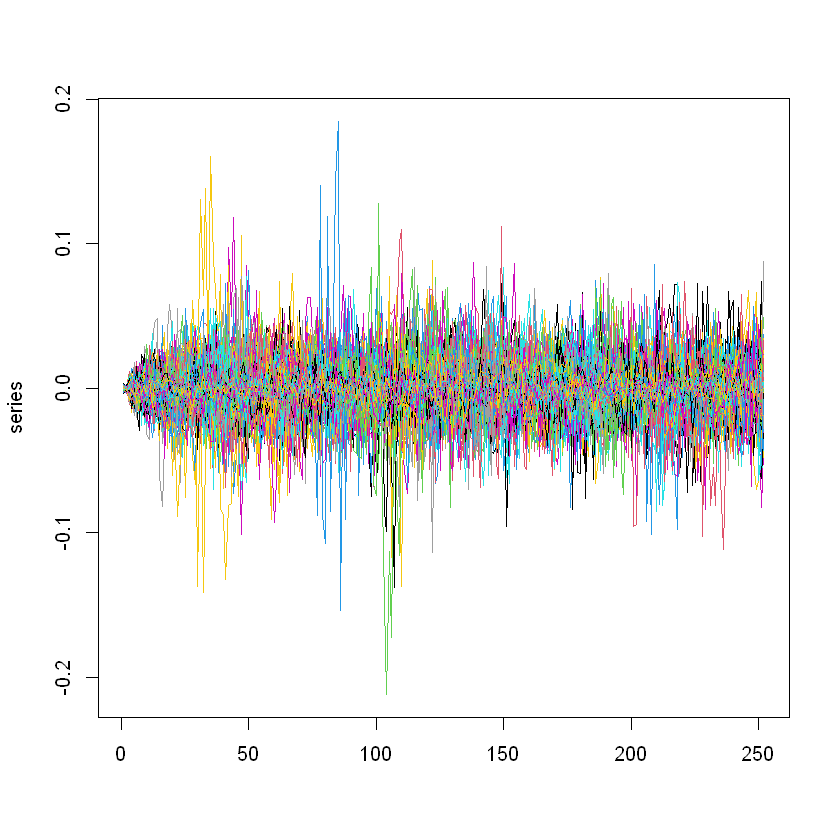

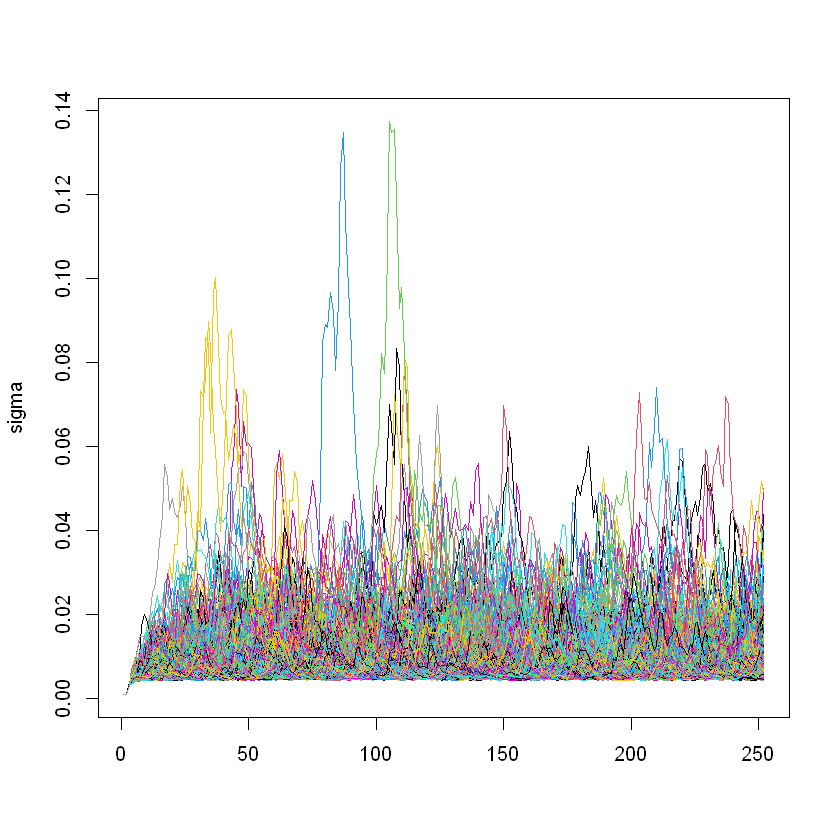

In [8]:
matplot(series, type = "l", col = 1:simulacoes, lty = 1)
matplot(sigma, col = 1:simulacoes, lty = 1, type = "l")

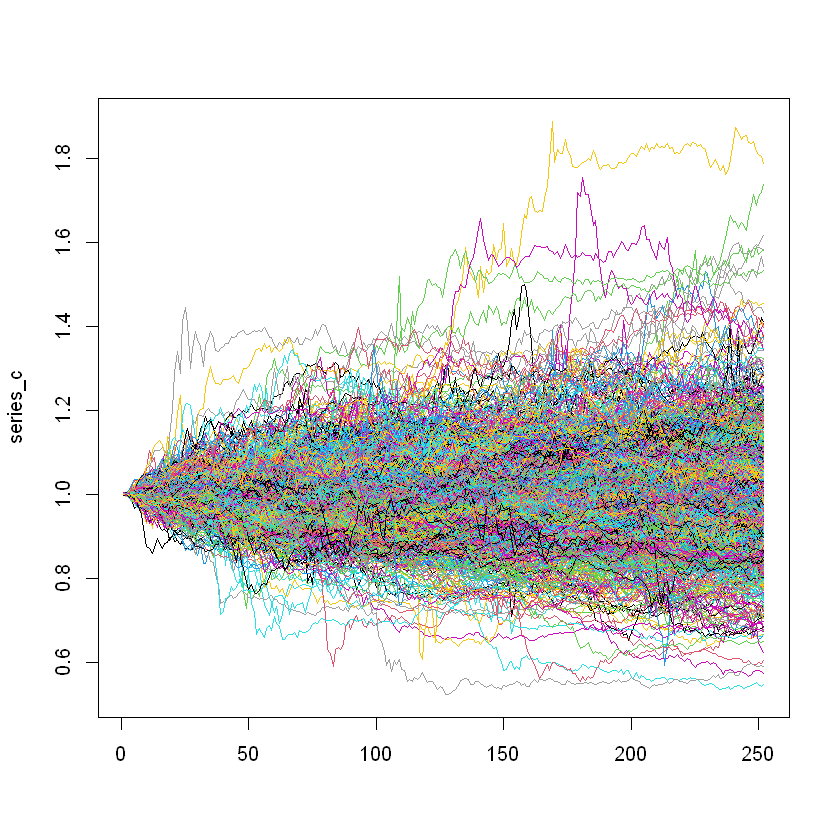

In [5]:
series_c <- apply(series+1,2,cumprod)
matplot(series_c, type = "l", lty = 1, col = 1:simulacoes)

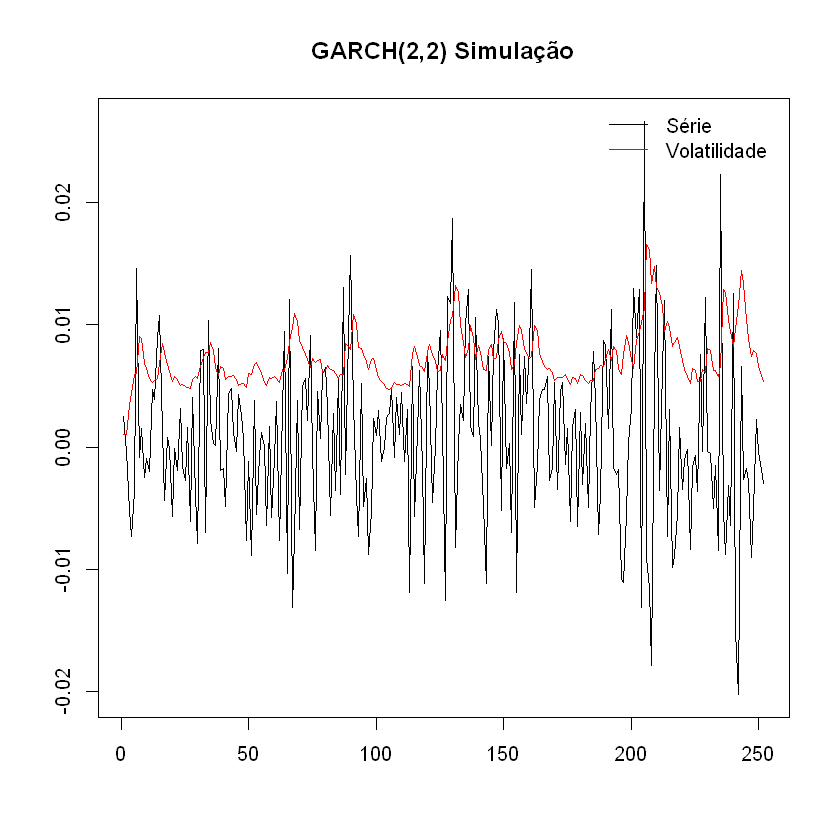

In [6]:
plot(series[,1], type = "l", 
     main = "GARCH(2,2) Simulação",
     xlab = "", ylab = "")
lines(sigma[,1], col = "red")
legend("topright", legend = c("Série","Volatilidade"),
       col = c("black","red"), lty = 1, bty = "n")